In [163]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [164]:
os.chdir('../input')

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
sample_submssion = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')

In [166]:
print(train_data.shape)
train_data.head(10)


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [167]:
print(test_data.shape)
test_data.head(10)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [168]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Handling NaNs

In [169]:
train_data.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

as the data size is around 1460 rows and more than 1100 values of features pool quality, misc feature, alley , fence are missing, droping them wont make a diffence in the predictions. 

In [170]:
drop_data = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
# or use inplace = True in drop()
train_data = train_data.drop(drop_data, axis = 1)
train_data.shape

(1460, 77)

In [171]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis = 1,keys = ['total','percent'])
missing_data.head(10)
#removing data with % of null values more than 0.1

,total,percent
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342


In [172]:
x_train = train_data.drop((missing_data[missing_data['percent'] > 0.1]).index,1)
x_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [173]:
print(x_train.isnull().sum().max())
# null values still present
print(train_data.dtypes.value_counts())
x_train = x_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(x_train.isnull().sum().max())
x_train.head()

81
object     39
int64      35
float64     3
dtype: int64
0


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


similarly droping in test data

In [174]:
test_data.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [175]:
test_data.drop(drop_data, axis = 1, inplace = True)
print(test_data.shape)
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis = 1,keys = ['total','percent'])
missing_data.head(10)
#removing data with % of null values more than 0.1
test_data = test_data.drop((missing_data[missing_data['percent']>0.1]).index,1)
test_data = test_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
x_train.drop('Id', axis = 1, inplace = True)
test_data.drop('Id', axis = 1, inplace = True)

(1459, 76)


In [176]:
print(x_train.shape)
print(test_data.shape)

(1460, 74)
(1459, 73)


Looking above, we can understand the need to first saperate the object data from the int/float data to study correlation between dependent and independent variables

In [177]:
# data_int/float
data_if = train_data.dtypes[train_data.dtypes.values!= 'object'].index
#data_object
data_obj = train_data.dtypes[train_data.dtypes.values== 'object'].index

In [178]:
# studying correlation 

In [179]:
temp_data = train_data.copy()
temp_data.drop(data_obj, axis = 1, inplace = True)

### Visualizing features

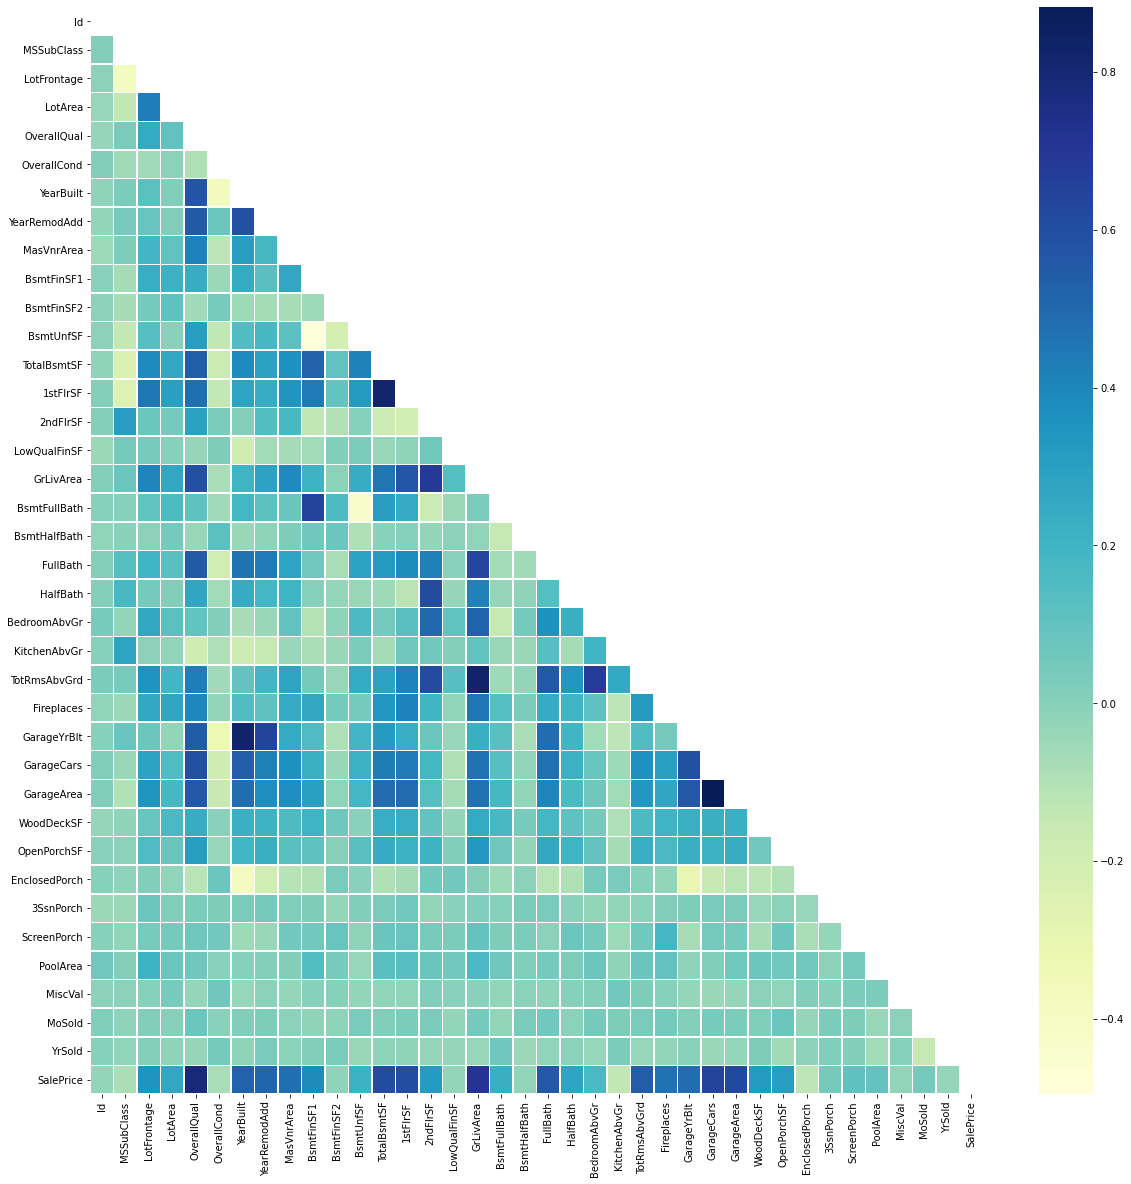

In [180]:
mask = np.zeros_like(temp_data.corr(method = 'spearman'))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20,20))
sns.heatmap(temp_data.corr(), linewidths = 0.5, cmap = 'YlGnBu', mask = mask)
plt.show()

More darker is the grid, more it is highly correlated with its corresponing row and column entity

In [181]:
# value of correlation coefficients
coefs = temp_data.corr()['SalePrice'].abs().sort_values()
print(coefs)

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [182]:
train_data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


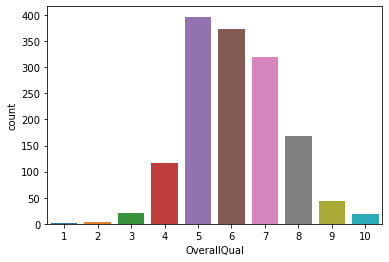

In [183]:
sns.countplot(train_data['OverallQual'])
plt.show()

In [184]:
coefs = temp_data.corr()['SalePrice'].abs().sort_values()
indexes = coefs[coefs.values >= 0.1].index
indexes = indexes[:indexes.size - 1]
indexes

Index(['ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'OpenPorchSF',
       '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1', 'Fireplaces',
       'MasVnrArea', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt',
       'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'GarageCars', 'GrLivArea', 'OverallQual'],
      dtype='object')

Visualising the above features as they have correlation coefficient of more than 0.1 with the saleprices

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


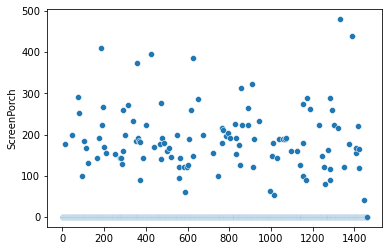

In [185]:
sns.scatterplot(range(1,1461), temp_data['ScreenPorch'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


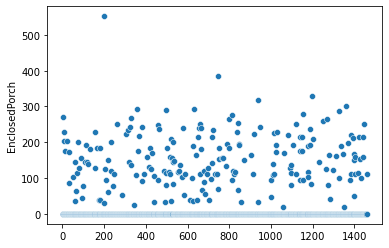

In [186]:
sns.scatterplot(range(1,1461), temp_data['EnclosedPorch'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


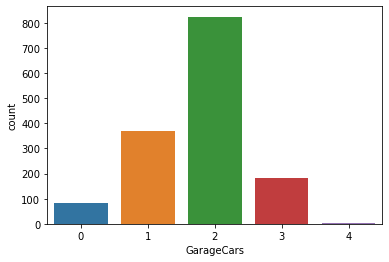

In [187]:
sns.countplot(temp_data['GarageCars'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


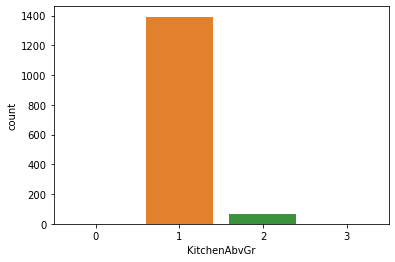

In [188]:
sns.countplot(temp_data['KitchenAbvGr'])
plt.show()

5 denotes the average value of overall quality , hence most of the houses have over all quality equal to or more than average

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea'>

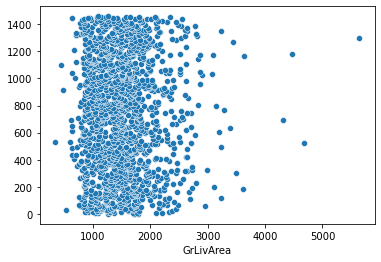

In [189]:
sns.scatterplot(train_data['GrLivArea'],range(0,1460))
# most of the values lie around 1000 to 2000 m2

## Similary one can visualize all the important factors which affect the sale prices

using label encoder for object data columns

In [190]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include = 'object').columns

for x in cols:
    label = LabelEncoder()
    label.fit(list(x_train[x].values))
    x_train[x] = label.transform(list(x_train[x].values))
    test_data[x] = label.transform(list(test_data[x].values))

In [191]:
x_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


In [192]:
#Bringing correlation once again into account
coefs = x_train.corr()['SalePrice'].abs().sort_values()
features = coefs.tail(20).index

In [193]:
y_train = x_train['SalePrice']
x_train = x_train[list(features)]
x_train.drop('SalePrice',axis = 1, inplace = True)
n = features.size
test_data = test_data[list(features[:n-1])]
test_data.head()

,BsmtFinSF1,GarageYrBlt,HeatingQC,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,GarageFinish,FullBath,KitchenQual,1stFlrSF,TotalBsmtSF,BsmtQual,GarageArea,ExterQual,GarageCars,GrLivArea,OverallQual
0,468.0,1961.0,4,0,0.0,1961,1961,5,2,1,3,896,882.0,3,730.0,3,1.0,896,5
1,923.0,1958.0,4,0,108.0,1958,1958,6,2,1,2,1329,1329.0,3,312.0,3,1.0,1329,6
2,791.0,1997.0,2,1,0.0,1998,1997,6,0,2,3,928,928.0,2,482.0,3,2.0,1629,5
3,602.0,1998.0,0,1,20.0,1998,1998,7,0,2,2,926,926.0,3,470.0,3,2.0,1604,6
4,263.0,1992.0,0,0,0.0,1992,1992,5,1,2,2,1280,1280.0,2,506.0,2,2.0,1280,8


In [194]:
x_train.head()

,BsmtFinSF1,GarageYrBlt,HeatingQC,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,TotRmsAbvGrd,GarageFinish,FullBath,KitchenQual,1stFlrSF,TotalBsmtSF,BsmtQual,GarageArea,ExterQual,GarageCars,GrLivArea,OverallQual
0,706,2003.0,0,0,196.0,2003,2003,8,1,2,2,856,856,2,548,2,2,1710,7
1,978,1976.0,0,1,0.0,1976,1976,6,1,2,3,1262,1262,2,460,3,2,1262,6
2,486,2001.0,0,1,162.0,2002,2001,6,1,2,2,920,920,2,608,2,2,1786,7
3,216,1998.0,2,1,0.0,1970,1915,7,2,1,2,961,756,3,642,3,3,1717,7
4,655,2000.0,0,1,350.0,2000,2000,9,1,2,2,1145,1145,2,836,2,3,2198,8


In [195]:
#import xgboost as xgb
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
X_train,X_test, Y_train,Y_test = train_test_split(x_train,y_train, test_size = 0.2)

In [196]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of Y_train: {}".format(Y_train.shape))

Shape of X_train: (1168, 19)
Shape of Y_train: (1168,)


In [197]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 0.1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
y_pred = np.asarray(y_pred).reshape(-1,1)
y_true = np.asarray(Y_test.values).reshape(-1,1)

In [198]:
from sklearn.metrics import r2_score, mean_squared_log_error,mean_squared_error
print("R2 score = {}".format(r2_score(y_true, y_pred)))
print('log error: {}'.format(mean_squared_log_error(y_true,y_pred)))

R2 score = 0.4984597946237266
log error: 0.04152507365840561


In [199]:
y_res = clf.predict(test_data)

In [200]:
submission = pd.DataFrame()
submission['Id'] = list(range(1461,2920))
submission['SalePrice'] = y_res
submission.head()


,Id,SalePrice
0,1461,105024.987511
1,1462,166822.164261
2,1463,178517.421751
3,1464,185723.775028
4,1465,198667.916128


In [201]:
import os
os.chdir('../working')

In [202]:
submission.to_csv('submission.csv',index = False)

In [203]:
#XG boost regressor
import xgboost as xgb
model_2 = xgb.XGBRegressor(objective = 'reg:linear', n_estimators = 10, seed = 123)
model_2.fit(X_train,Y_train)
pred = model_2.predict(X_test)


[08:39:33] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [204]:
pred = np.asarray(pred).reshape(-1,1)
y_true = np.asarray(Y_test.values).reshape(-1,1)
from sklearn.metrics import r2_score, mean_squared_log_error,mean_squared_error
print("R2 score = {}".format(r2_score(y_true, y_pred)))
print('log error: {}'.format(mean_squared_log_error(y_true,y_pred)))

R2 score = 0.4984597946237266
log error: 0.04152507365840561
